<a href="https://colab.research.google.com/github/Aleksandr62aa/ML_DL/blob/main/CNN_LeNet5_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification of handwritten numbers by convolution
    neural network**

**Dataset MNIST**

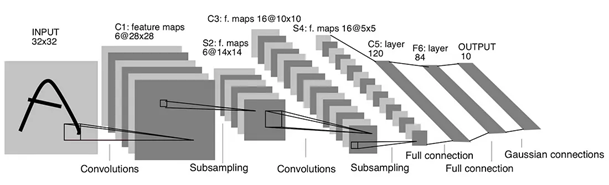

**Figure**

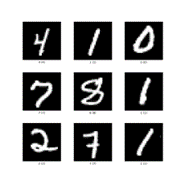

**LeNet5:**

**Conv 5x5** --> **2 Conv 3x3**.

**Tanh** --> **ReLu**.

**Average Pooling**  --> **Max Pooling**.

**BatchNorm**

**Importing libraries**

In [14]:
import torch
import random
import numpy as np
import torchvision.transforms as transforms
import torchvision.datasets
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
from PIL import Image

# Fixed seed
random.seed(1)
np.random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
torch.backends.cudnn.deterministic = True

In [15]:
# Hyperparameters
batch_size = 100
learning_rate = 1.0e-3
num_epochs = 15

In [16]:
# GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

**Train Test dataset**

In [17]:
train_MNIST = torchvision.datasets.MNIST('./', download=True, train=True, transform=ToTensor())
test_MNIST = torchvision.datasets.MNIST('./', download=True, train=False, transform=ToTensor())

train_dataloader_MNIST = torch.utils.data.DataLoader(
    train_MNIST, batch_size=batch_size, shuffle=True, num_workers=batch_size)

test_dataloader_MNIST = torch.utils.data.DataLoader(
    test_MNIST, batch_size=len(test_MNIST), shuffle=True, num_workers=batch_size)

In [18]:
len(train_MNIST), len(train_dataloader_MNIST)

(60000, 600)

**Image**

In [19]:
def image_plot(x):
  plt.imshow(x.permute(1, 2, 0), cmap='gray')

number = 4


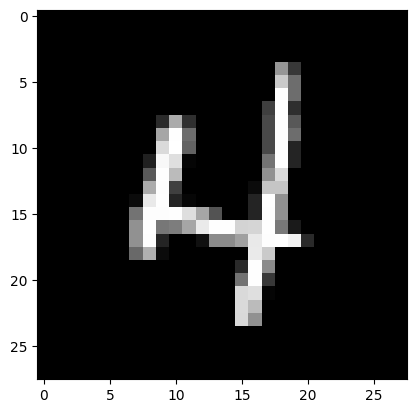

In [20]:
X_batch, y_batch = next(iter(train_dataloader_MNIST))
image_plot(X_batch[0])
print ("number =", y_batch[0].data.numpy());

**Model CNN**

In [21]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.model = torch.nn.Sequential(
          # conv1
          torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, padding=1),
          torch.nn.Conv2d(in_channels=6, out_channels=6, kernel_size=3, padding=1),
          torch.nn.ReLU(),
          #torch.nn.BatchNorm2d(num_features=6),
          torch.nn.MaxPool2d(kernel_size=2, stride=2),
          # conv2
          torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, padding=0),
          torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=0),
          torch.nn.ReLU(),
          torch.nn.BatchNorm2d(num_features=16),
          torch.nn.AvgPool2d(kernel_size=2, stride=2),
          # conv3
          torch.nn.Flatten(),
          # FC1
          torch.nn.Linear(5 * 5 * 16, 120),
          torch.nn.ReLU(),
          # torch.nn.BatchNorm1d(num_features=120),
          # FC2
          torch.nn.Linear(120, 84),
          torch.nn.Sigmoid(),
          # torch.nn.BatchNorm1d(num_features=84),
          torch.nn.Linear(84, 10)
        )

    def forward(self, x):
        return self.model(x)

model = LeNet5().to(device)

**Loss function**

In [22]:
loss_fn = torch.nn.CrossEntropyLoss()

**Optimizer**

In [23]:
optimizer = torch.optim.Adam(model .parameters(), lr=learning_rate)

**Training procedure**

In [24]:
test_accuracy_history = []
test_loss_history = []

X_test, y_test = next(iter(test_dataloader_MNIST))
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(num_epochs):
  for batch in train_dataloader_MNIST:
      optimizer.zero_grad()
      model.train()

      X_batch, y_batch = batch

      X_batch = X_batch.to(device)
      y_batch = y_batch.to(device)

      y_preds = model(X_batch) ##

      loss_train = loss_fn(y_preds, y_batch)

      loss_train.backward()
      optimizer.step()

  model.eval()
  y_preds = model(X_test)

  loss_test = loss_fn(y_preds, y_test).cpu()
  test_loss_history.append(loss_test.item())

  accuracy = (y_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
  test_accuracy_history.append(accuracy)

  print(f"Epoch:{epoch} loss_train is {loss_train.item()}")
  print(f"accuracy_test:{accuracy} loss_test is {loss_test.item()}")

Epoch:0 loss_train is 0.06927230954170227
accuracy_test:0.9738999605178833 loss_test is 0.09321083873510361
Epoch:1 loss_train is 0.0498788058757782
accuracy_test:0.98499995470047 loss_test is 0.055248621851205826
Epoch:2 loss_train is 0.05739220231771469
accuracy_test:0.9797999858856201 loss_test is 0.06730525940656662
Epoch:3 loss_train is 0.024505002424120903
accuracy_test:0.989799976348877 loss_test is 0.03611267730593681
Epoch:4 loss_train is 0.014785733073949814
accuracy_test:0.9873999953269958 loss_test is 0.04174833372235298
Epoch:5 loss_train is 0.025941679254174232
accuracy_test:0.9901999831199646 loss_test is 0.03257381543517113
Epoch:6 loss_train is 0.05376725271344185
accuracy_test:0.988599956035614 loss_test is 0.0347382128238678
Epoch:7 loss_train is 0.0037772178184241056
accuracy_test:0.984499990940094 loss_test is 0.05176419019699097
Epoch:8 loss_train is 0.001157002174295485
accuracy_test:0.990399956703186 loss_test is 0.030907662585377693
Epoch:9 loss_train is 0.0562

**Result test**

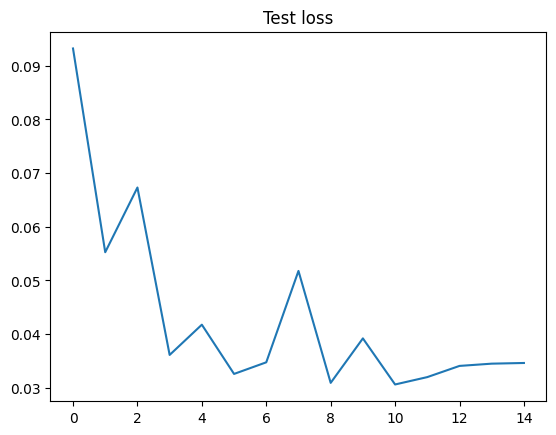

In [25]:
plt.plot(test_loss_history)
plt.title('Test loss');

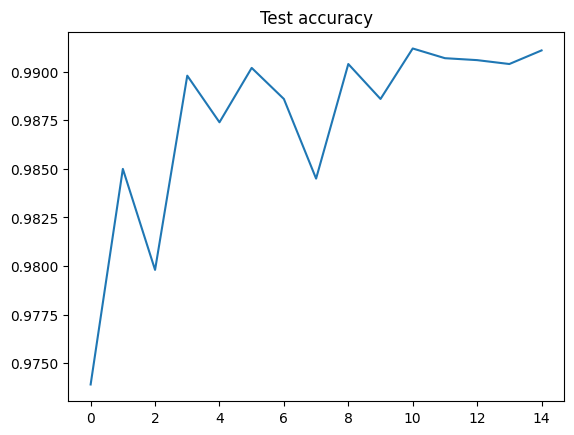

In [26]:
plt.plot(test_accuracy_history)
plt.title('Test accuracy');